# TP5 : Approches avancées pour la classification

## Exercice 1 :

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import time
from sklearn.metrics import precision_score,f1_score,recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb
from hmmlearn import hmm
import numpy as np
import shap
import numba

In [5]:

#============================= Data/Prétraitement/division des données ============================#

# Dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data.columns = ['Titre','Message','','','']
data['Titre'] = data['Titre'].map({'ham' : 0, 'spam' : 1})

# Prétraitement des données avec la vectorisation (transformation du texte en comptage de tokens)
Vectoriser = CountVectorizer()
X = Vectoriser.fit_transform(data['Message'])
Y = data['Titre']

# Division des données
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

Meilleurs paramètres: {'C': 100, 'gamma': 0.001}
Meilleure performance: 0.9846153846153847
Précision du modèle SVC :0.9642857142857143
Rappel du modèle SVC :0.8780487804878049
Score F1 du modèle SVC :0.9191489361702128
Temps d'éxécution :66.50407981872559
Matrice de confusion : [[1418    8]
 [  30  216]]


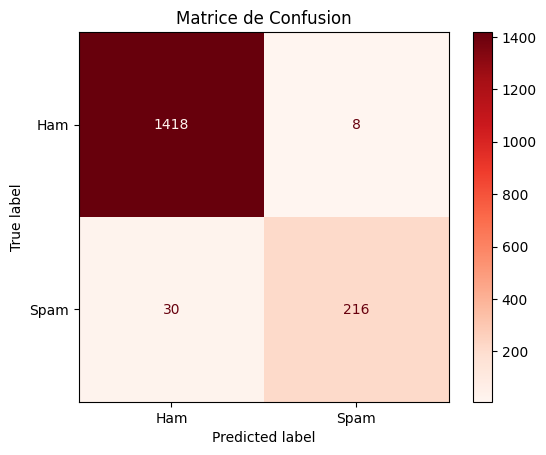

Précision du modèle SVC :0.96
Rappel du modèle SVC :0.8780487804878049
Score F1 du modèle SVC :0.9171974522292994
Temps d'éxécution :0.4785878658294678
Matrice de confusion : [[1417    9]
 [  30  216]]


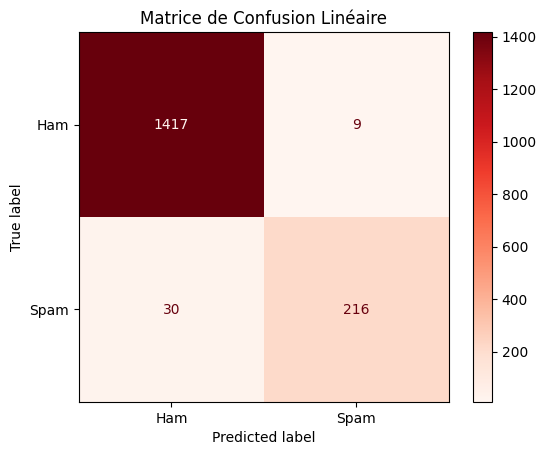

In [6]:
#=========================================== Exercice 1 ===========================================#

# Matrice de confusion RBF
timeSVC = time.time()
modeleSVC = SVC(kernel='rbf')
parametresSVM = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}

grid_search_SVC = GridSearchCV(modeleSVC,parametresSVM)
grid_search_SVC.fit(X_train, Y_train)
print(f"Meilleurs paramètres: {grid_search_SVC.best_params_}")
print(f"Meilleure performance: {grid_search_SVC.best_score_}")
meilleur_svm_model = grid_search_SVC.best_estimator_

Y_prediction = meilleur_svm_model.predict(X_test)

endtimeSVC = time.time()
tmp_executionSVC = endtimeSVC - timeSVC
precision = precision_score(Y_test,Y_prediction)
rappel = recall_score(Y_test, Y_prediction)
F1_score = f1_score(Y_test,Y_prediction)

print("===========================================================")
print(f"Précision du modèle SVC :{precision}")
print(f"Rappel du modèle SVC :{rappel}")
print(f"Score F1 du modèle SVC :{F1_score}")
print(f"Temps d'éxécution :{tmp_executionSVC}")

matrice_confusion = confusion_matrix(Y_test,Y_prediction)
print(f"Matrice de confusion : {matrice_confusion}")
disp = ConfusionMatrixDisplay(confusion_matrix=matrice_confusion, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Reds)
plt.title('Matrice de Confusion')
plt.show()

# Matrice de confusion linéaire
time_SVC_lineaire = time.time()
modeleSVClineaire = SVC(kernel='linear')
modeleSVClineaire.fit(X_train,Y_train)

Y_prediction_lineaire = modeleSVClineaire.predict(X_test)

endtime_SVC_lineaire = time.time()
tmp_executionSVC_lineaire = endtime_SVC_lineaire - time_SVC_lineaire
precision_lineaire = precision_score(Y_test,Y_prediction_lineaire)
rappel_lineaire = recall_score(Y_test, Y_prediction_lineaire)
F1_score_lineaire = f1_score(Y_test,Y_prediction_lineaire)

print("===========================================================")
print(f"Précision du modèle SVC :{precision_lineaire}")
print(f"Rappel du modèle SVC :{rappel_lineaire}")
print(f"Score F1 du modèle SVC :{F1_score_lineaire}")
print(f"Temps d'éxécution :{tmp_executionSVC_lineaire}")

matrice_confusion_lineaire = confusion_matrix(Y_test,Y_prediction_lineaire)
print(f"Matrice de confusion : {matrice_confusion_lineaire}")
disp = ConfusionMatrixDisplay(confusion_matrix=matrice_confusion_lineaire, display_labels=['Ham', 'Spam'])
disp.plot(cmap=plt.cm.Reds)
plt.title('Matrice de Confusion Linéaire')
plt.show()

On peut observer que les matrices ont des résultats quasiment similaire. Cependant on observe que le modèle SVM avec un noyau RBF prend énormement de temps avant de trouver le résulat (66 secondes contre 0,6 secondes). Dans notre cas, on suppose donc que le modèle SVM linéaire est plus performant que le modèle SVM avec un noyau RBF.

## Exercice 2 :

Précision du modèle Random Forest :0.9642857142857143
Rappel du modèle Random Forest :0.8780487804878049
Score F1 du modèle Random Forest     :0.9191489361702128
Temps d'éxécution :4.2576282024383545
Précision du modèle XGBoost :0.9642857142857143
Rappel du modèle XGBoost :0.8780487804878049
Score F1 du modèle XGBoost :0.9191489361702128
Temps d'éxécution :0.40761327743530273


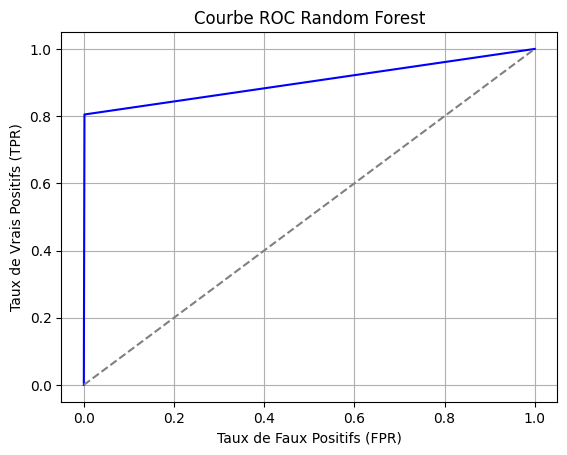

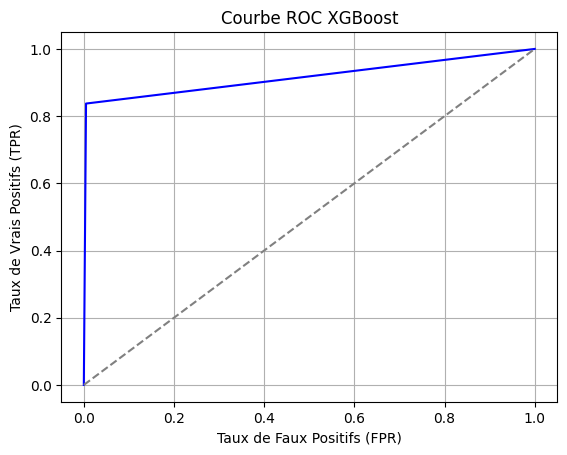

In [7]:
#=========================================== Exercice 2 ===========================================#

# Modèle de Random Forest
time_RF = time.time()
modele_RF = RandomForestClassifier(n_estimators=100)
modele_RF.fit(X_train, Y_train)
modele_RF_prediction = modele_RF.predict(X_test)

endtime_RF = time.time()
tmp_execution_RF = endtime_RF - time_RF
precision_RF = precision_score(Y_test,Y_prediction)
rappel_RF = recall_score(Y_test, Y_prediction)
F1_score_RF = f1_score(Y_test,Y_prediction)

print("===========================================================")
print(f"Précision du modèle Random Forest :{precision_RF}")
print(f"Rappel du modèle Random Forest :{rappel_RF}")
print(f"Score F1 du modèle Random Forest     :{F1_score_RF}")
print(f"Temps d'éxécution :{tmp_execution_RF}")

# Modèle de XGBoost
time_XGB = time.time()
modele_XGB = xgb.XGBClassifier(n_estimators=100,learning_rate=0.1)
modele_XGB.fit(X_train, Y_train)
modele_XGB_prediction = modele_XGB.predict(X_test)

endtime_XGB = time.time()
tmp_execution_XGB = endtime_XGB - time_XGB
precision_XGB = precision_score(Y_test,Y_prediction)
rappel_XGB = recall_score(Y_test, Y_prediction)
F1_score_XGB = f1_score(Y_test,Y_prediction)

print("===========================================================")
print(f"Précision du modèle XGBoost :{precision_XGB}")
print(f"Rappel du modèle XGBoost :{rappel_XGB}")
print(f"Score F1 du modèle XGBoost :{F1_score_XGB}")
print(f"Temps d'éxécution :{tmp_execution_XGB}")

a, b, c = roc_curve(Y_test, modele_RF_prediction)
roc_auc_RF = roc_auc_score(Y_test, modele_RF_prediction)
a2, b2, c2 = roc_curve(Y_test, modele_XGB_prediction)
roc_auc_XGB = roc_auc_score(Y_test, modele_XGB_prediction)

# Tracer la courbe ROC
plt.figure()
plt.plot(a, b, color='blue', label=f'ROC Curve (AUC = {roc_auc_RF})')

# Courbe de référence
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC Random Forest')
plt.grid()
plt.show()

# Tracer la courbe ROC
plt.figure()
plt.plot(a2, b2, color='blue', label=f'ROC Curve (AUC = {roc_auc_XGB})')

# Courbe de référence
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC XGBoost')
plt.grid()
plt.show()

Nous pouvons contaster qu'au niveau des performances, ils sont entièrement identique que se soit sur le F1, la précision et le rappel. Cependant, le temps d'exécution du modèle Random Forest est beaucoup plus lent que le modèle XGBoost dans notre cas.

Les modèles d'ensemble comporte des avantages face aux données désordonnées :
- La performance améliorée car elle combine différent modèles.
- Un meilleure robustesse car elles combinent plusieurs modèles et permet de les rendre moins sensibles aux variations de données.

## Exercice 3 :

In [12]:
#=========================================== Exercice 3 ===========================================#
def vectorisation_sequentielle(textes):
    vocab = set()
    for texte in textes:
        vocab.update(texte.split())
    word_to_id = {word: i for i, word in enumerate(vocab)}
    sequences = []
    for texte in textes:
        seq = [word_to_id.get(word, len(vocab)) for word in texte.split()[:200]]
        seq += [len(vocab)] * (200 - len(seq))
        sequences.append(seq)
    return np.array(sequences)


X_seq = vectorisation_sequentielle(data['Message'])
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_seq, Y, test_size=0.3)

time_hmm = time.time()
modele_hmm = hmm.MultinomialHMM(n_components=2)
modele_hmm.fit(X_train_seq)

# Prédiction
Y_predrection_hmm = modele_hmm.predict(X_test_seq)

endtime_hmm = time.time()
tmp_execution_hmm = endtime_hmm - time_hmm
resultat_HMM = classification_report(Y_test, Y_predrection_hmm)
print(resultat_HMM)
print(f"Temps d'éxécution :{tmp_execution_hmm}")

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1426
           1       0.13      0.32      0.19       246

    accuracy                           0.60      1672
   macro avg       0.49      0.48      0.46      1672
weighted avg       0.74      0.60      0.65      1672

Temps d'éxécution :1.4385523796081543


Les modèles de Markov Cachés sont des modèles qui évoluent d'un état à l'autre selon des probabilités. Dans le cas des modèles de Markov Cachés, les états du systèmes sont cachés.

Le modèle de Markov Cachée comporte des défis :
- Le besoin de données séquentielle peut être moins efficace que d'autres méthodes, par exemple le modèle Naïve Bayes peut être plus adapté pour classifier les données textuelles
- La gestion des longueurs des textes car tous les textes ne sont pas de la même longueur et nous devons nous adapter à chaque fois.

## Exercice 4

In [ ]:
#=========================================== Exercice 4 ===========================================#
# Modèle de Shap
explainer = shap.TreeExplainer(modele_RF)
shap_values = explainer.shap_values(X_test.toarray())

# Résumé des caractéristiques
shap.summary_plot(shap_values[1], X_test.toarray(), feature_names=Vectoriser.get_feature_names_out())

# Diagramme de force
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test[0], feature_names=Vectoriser.get_feature_names_out())

# Diagramme de bars
shap.summary_plot(shap_values[1], X_test.toarray(), plot_type='bar', feature_names=Vectoriser.get_feature_names_out())

Dans cet exercice, j'ai des soucis avec lancement de ce modèle qui me prennait plus d'une heure. Je ne peux donc pas exécuter le programme correctement et donc ne peux pas afficher ce qui est demandé pour cet exercice.

## Exercice 5 :

In [13]:
#=========================================== Exercice 5 ===========================================#
print("====================SVM====================")
print(f"Précision du modèle SVC :{precision}")
print(f"Rappel du modèle SVC :{rappel}")
print(f"Score F1 du modèle SVC :{F1_score}")
print(f"Temps d'éxécution :{tmp_executionSVC}")
print("====================Random Forest====================")
print(f"Précision du modèle Random Forest :{precision_RF}")
print(f"Rappel du modèle Random Forest :{rappel_RF}")
print(f"Score F1 du modèle Random Forest     :{F1_score_RF}")
print(f"Temps d'éxécution :{tmp_execution_RF}")
print("====================XG Boost====================")
print(f"Précision du modèle XGBoost :{precision_XGB}")
print(f"Rappel du modèle XGBoost :{rappel_XGB}")
print(f"Score F1 du modèle XGBoost :{F1_score_XGB}")
print(f"Temps d'éxécution :{tmp_execution_XGB}")
print("====================Modèle de Markov Caché====================")
print(resultat_HMM)
print(f"Temps d'éxécution :{tmp_execution_hmm}")

====================SVM====================
Précision du modèle SVC :0.9642857142857143
Rappel du modèle SVC :0.8780487804878049
Score F1 du modèle SVC :0.9191489361702128
Temps d'éxécution :66.50407981872559
====================Random Forest====================
Précision du modèle Random Forest :0.9642857142857143
Rappel du modèle Random Forest :0.8780487804878049
Score F1 du modèle Random Forest     :0.9191489361702128
Temps d'éxécution :4.2576282024383545
====================XG Boost====================
Précision du modèle XGBoost :0.9642857142857143
Rappel du modèle XGBoost :0.8780487804878049
Score F1 du modèle XGBoost :0.9191489361702128
Temps d'éxécution :0.40761327743530273
====================Modèle de Markov Caché====================
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1426
           1       0.13      0.32      0.19       246

    accuracy                           0.60      1672
   macro avg       0.49     

En observant les résultats, nous pouvons contaster que les deux modèles les plus efficaces sont le Random Forest ainsi que le XG Boost. Ils ont les meilleurs scores F1, les meilleures précisions et les meilleurs rappels.

In [28]:
# Modèle de base pour le Stacking Classifier
modeles_de_base = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', xgb.XGBClassifier(n_estimators=100,learning_rate=0.1))
]

# Création du Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=modeles_de_base,
    final_estimator=RandomForestClassifier(n_estimators=100)
)

stacking_classifier.fit(X_train, Y_train)

Y_prediction_stacking = stacking_classifier.predict(X_test)
print(classification_report(Y_test, Y_prediction_stacking))
print(f"Score ROC-AUC: {roc_auc_score(Y_test, stacking_classifier.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1426
           1       0.97      0.91      0.94       246

    accuracy                           0.98      1672
   macro avg       0.97      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Score ROC-AUC: 0.9728987787774092


On peut observer que le Stacking Classifier a permis d'avoir une meilleure précision, un meilleur rappel, un meilleur score F1 et un meilleure score ROC-AUC.

Testons maintenant un melange d'autres modèles :

In [32]:
# Modèle de base pour le Stacking Classifier
modeles_de_base = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', xgb.XGBClassifier(n_estimators=100,learning_rate=0.1)),
    ('svm', SVC(kernel='rbf'))
]

# Création du Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=modeles_de_base,
    final_estimator=SVC(kernel='rbf', probability= True)
)

stacking_classifier.fit(X_train, Y_train)

Y_prediction_stacking = stacking_classifier.predict(X_test)
print(classification_report(Y_test, Y_prediction_stacking))
print(f"Score ROC-AUC: {roc_auc_score(Y_test, stacking_classifier.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1426
           1       0.98      0.89      0.93       246

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Score ROC-AUC: 0.9660714489332831


In [33]:
# Modèle de base pour le Stacking Classifier
modeles_de_base = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', xgb.XGBClassifier(n_estimators=100,learning_rate=0.1)),
]

# Création du Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=modeles_de_base,
    final_estimator=xgb.XGBClassifier(n_estimators=100,learning_rate=0.1)
)

stacking_classifier.fit(X_train, Y_train)

Y_prediction_stacking = stacking_classifier.predict(X_test)
print(classification_report(Y_test, Y_prediction_stacking))
print(f"Score ROC-AUC: {roc_auc_score(Y_test, stacking_classifier.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1426
           1       0.97      0.88      0.92       246

    accuracy                           0.98      1672
   macro avg       0.97      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Score ROC-AUC: 0.9892344838595653


In [36]:
# Modèle de base pour le Stacking Classifier
modeles_de_base = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svm', SVC(kernel='rbf')),
    ('xgb', xgb.XGBClassifier(n_estimators=100,learning_rate=0.1))
]

# Création du Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=modeles_de_base,
    final_estimator=xgb.XGBClassifier(n_estimators=100,learning_rate=0.1)
)

stacking_classifier.fit(X_train, Y_train)

Y_prediction_stacking = stacking_classifier.predict(X_test)
print(classification_report(Y_test, Y_prediction_stacking))
print(f"Score ROC-AUC: {roc_auc_score(Y_test, stacking_classifier.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1426
           1       0.97      0.91      0.94       246

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.97      1672
weighted avg       0.98      0.98      0.98      1672

Score ROC-AUC: 0.9890677202704706


Cas où un des modèle est supérieur à d'autres :
- SVM avec noyau RBF : Efficace dans des espaces à D dimensions.
- RF : Efficace lorsqu'il y a des données déséquilibrés comme celui que nous faisons.
- XGB : Efficace lorsqu'il faut la meilleure précision possible et permet de limiter le surapprentissage.
- HMM : Efficace lorsqu'il y a des séquences cachées dans les données.

In [37]:
# Modèle de base pour le Stacking Classifier
modeles_de_base = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svm', SVC(kernel='rbf')),
    ('xgb', xgb.XGBClassifier(n_estimators=100,learning_rate=0.1))
]

# Création du Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=modeles_de_base,
    final_estimator=xgb.XGBClassifier(n_estimators=100,learning_rate=0.1)
)

stacking_classifier.fit(X_train, Y_train)

Y_prediction_stacking = stacking_classifier.predict(X_test)
print(classification_report(Y_test, Y_prediction_stacking))
print(f"Score ROC-AUC: {roc_auc_score(Y_test, stacking_classifier.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1426
           1       0.97      0.90      0.94       246

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Score ROC-AUC: 0.98852752026819


Ce modèle serait donc pour moi le Stacking Classifier le plus optimale car il a une grande robustesse, il pourra gérer les problèmes de dimensions s'il y en a ainsi que de gérer les grands ensembles de données en plus d'avoir un temps d'exécution qui est correcte.

## Exercice 6 :

## Discussion : Voici un tableau SWOT de tous les modèles vu en TP :

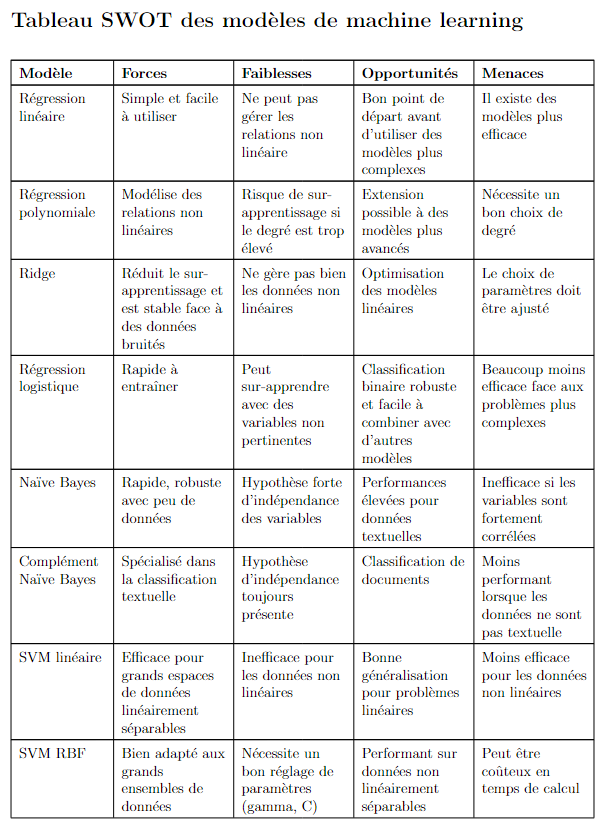
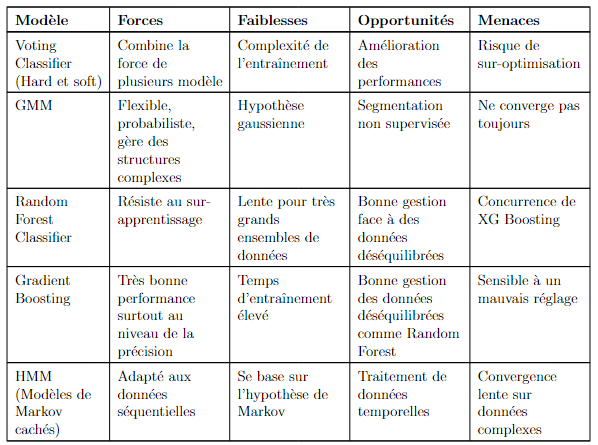

On peut donc distinguer différent type de modèles, en commançant par :
- Les modèles linéaires (Regréssion Linéaire, Regréssion Polynomiale, Régression Ridge et Régression Logistique)
- Les modèles probabilistes (Naïve Bayes, Complément Naïve Bayes et Markov cachés)
- Les modèles avec des SVM (Linéaire, Polynomiale, RBF)
- Les modèles assemblant des modèles ou des ensembles (Voting Classifier, Random Forest, XG Boost)
- Les modèles avec du clustering (GMM)